In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def print_results(p_path,p_model_name,p_features_used,p_used_number,all_data=False):
    print("Model name: ", p_model_name)
    print("\n")
    mean_time_read=np.array(pd.read_csv(p_path+p_model_name+"_time_"+str(p_features_used)+".csv",header=None))[0]
    mean_roc_read=np.array(pd.read_csv(p_path+p_model_name+"_roc_"+str(p_features_used)+".csv",header=None))[0]
    mean_ap_read=np.array(pd.read_csv(p_path+p_model_name+"_ap_"+str(p_features_used)+".csv",header=None))[0]
    if all_data:
        print("AUC scores\n", mean_roc_read[0:p_used_number])
        
    AUC_mean=np.mean(mean_roc_read[0:p_used_number])
    AUC_std=np.std(mean_roc_read[0:p_used_number])
    
    print("Mean AUC score: ",AUC_mean,
          "\nStd of AUC scores: ",AUC_std, "\n \n")
    
    if all_data:
        print("AP scores\n", mean_ap_read[0:p_used_number])
        
    AP_mean=np.mean(mean_ap_read[0:p_used_number])
    AP_std=np.std(mean_ap_read[0:p_used_number])
    print("Mean AP score: ", AP_mean ,
          "\nStd of AP scores: ", AP_std, "\n \n")

    if all_data:
        print("Total Running times\n", mean_time_read[0:p_used_number])
    print("Mean total running time: ", np.mean(mean_time_read[0:p_used_number]),
          "\nStd of total running time: ", np.std(mean_time_read[0:p_used_number]), "\n \n")
    
    return AUC_mean,AUC_std,AP_mean,AP_std

In [3]:
datasets_name=['1Cora','2Citeseer','3Pubmed']
p_model_name=['linear_vae','gcn_vae','deep6_gcn_vae','deep12_gcn_vae','deep18_gcn_vae','deep36_gcn_vae']

adj_AUC_mean_gather_all_datasets=[]
adj_AUC_std_gather_all_datasets=[]
adj_AP_mean_gather_all_datasets=[]
adj_AP_std_gather_all_datasets=[]
    
for datasets_name_i in datasets_name:
    print(datasets_name_i)
    p_path="./GVAE/"+datasets_name_i+"_AE/log/"

    adj_AUC_mean_gather=[]
    adj_AUC_std_gather=[]
    adj_AP_mean_gather=[]
    adj_AP_std_gather=[]

    for p_model_name_i in p_model_name:
        p_features_used=False
        p_used_number=10
        AUC_mean_,AUC_std_,AP_mean_,AP_std_=print_results(p_path,p_model_name_i,p_features_used,p_used_number,all_data=False)
        adj_AUC_mean_gather.append(AUC_mean_)
        adj_AUC_std_gather.append(AUC_std_)
        adj_AP_mean_gather.append(AP_mean_)
        adj_AP_std_gather.append(AP_std_)
        print("----------------------------------------------------------\n")
    
    adj_AUC_mean_gather_all_datasets.append(adj_AUC_mean_gather)
    adj_AUC_std_gather_all_datasets.append(adj_AUC_std_gather)
    adj_AP_mean_gather_all_datasets.append(adj_AP_mean_gather)
    adj_AP_std_gather_all_datasets.append(adj_AP_std_gather)

1Cora
Model name:  linear_vae


Mean AUC score:  0.8518199395813906 
Std of AUC scores:  0.014649701103266355 
 

Mean AP score:  0.8831229942531522 
Std of AP scores:  0.011137793384524242 
 

Mean total running time:  49.29474623203278 
Std of total running time:  1.298255904770599 
 

----------------------------------------------------------

Model name:  gcn_vae


Mean AUC score:  0.8364877272449041 
Std of AUC scores:  0.015935271868125864 
 

Mean AP score:  0.8739996229619494 
Std of AP scores:  0.011835334234313287 
 

Mean total running time:  53.29949040412903 
Std of total running time:  1.163249146284849 
 

----------------------------------------------------------

Model name:  deep6_gcn_vae


Mean AUC score:  0.8010495843070045 
Std of AUC scores:  0.019953843228165416 
 

Mean AP score:  0.8131223962151057 
Std of AP scores:  0.018531383818115657 
 

Mean total running time:  54.98497259616852 
Std of total running time:  1.719577664236963 
 

-------------------------

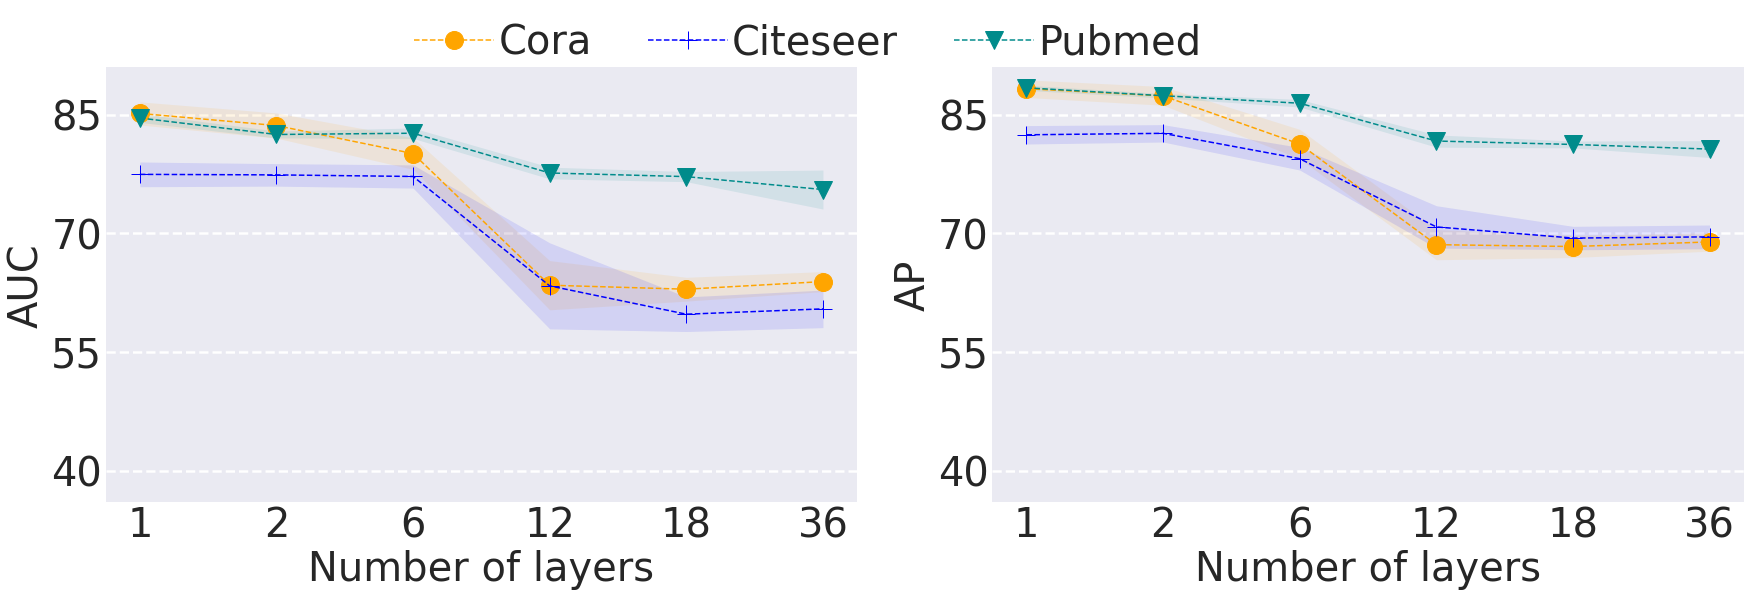

In [4]:
plt.style.use('seaborn-dark')
legend_names=['Cora','Citeseer','Pubmed']

x_names=['1','2','6','12','18','36']
x_names_dis = np.arange(len(x_names))

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(26,8))

ax1.grid(True,linestyle='--',linewidth = 2.5,zorder=-1,axis="y")
ax1.set_xticks(x_names_dis)
ax1.set_xticklabels(x_names,rotation = 0, ha="center")
ax1.set_xlabel('Number of layers', fontsize = 40)
ax1.set_yticks(np.arange(0.4,0.91,0.15))
ax1.set_yticklabels(['40','55','70','85'],rotation = 0, ha="right")
ax1.set_ylabel('AUC', fontsize = 40)
ax1.tick_params(labelsize=40)
ax1.set_ylim([0.36, 0.91])

ax2.grid(True,linestyle='--',linewidth = 2.5,zorder=-1,axis="y")
ax2.set_xticks(x_names_dis)
ax2.set_xticklabels(x_names,rotation = 0, ha="center")
ax2.set_xlabel('Number of layers', fontsize =40)
ax2.set_yticks(np.arange(0.4,0.91,0.15))
ax2.set_yticklabels(['40','55','70','85'],rotation = 0, ha="right")
ax2.set_ylabel('AP', fontsize = 40)
ax2.tick_params(labelsize=40)
ax2.set_ylim([0.36, 0.91])

markers=['o','+','v','2','s','X','d','>','*','<']
cs=['orange','blue','darkcyan','fuchsia','chocolate','dodgerblue','aqua','green','red','purple']

for i in np.arange(len(legend_names)):
    ax1.plot(x_names_dis, adj_AUC_mean_gather_all_datasets[i], marker=markers[i], linestyle='--',c=cs[i],ms=18)
    ax1.fill_between(x_names_dis, np.array(adj_AUC_mean_gather_all_datasets[i])-np.array(adj_AUC_std_gather_all_datasets[i]), np.array(adj_AUC_mean_gather_all_datasets[i])+np.array(adj_AUC_std_gather_all_datasets[i]), color=cs[i], alpha=0.1,linewidth=0.0)

for i in np.arange(len(legend_names)):
    ax2.plot(x_names_dis, np.array(adj_AP_mean_gather_all_datasets[i]), marker=markers[i],linestyle='--', c=cs[i],ms=18)
    ax2.fill_between(x_names_dis, np.array(adj_AP_mean_gather_all_datasets[i])-np.array(adj_AP_std_gather_all_datasets[i]),np.array(adj_AP_mean_gather_all_datasets[i])+np.array(adj_AP_std_gather_all_datasets[i]), color=cs[i], alpha=0.1,linewidth=0.0)

plt.subplots_adjust(right=1,wspace =0.18,hspace =0)

fig.legend(labels=legend_names,fontsize=40, loc='upper center', bbox_to_anchor=(0.5,1.02),ncol=3,handletextpad=0.1,columnspacing=1.4, fancybox=True,framealpha=0.1,shadow=True)

plt.show()

In [5]:
fea_AUC_mean_gather_all_datasets=[]
fea_AUC_std_gather_all_datasets=[]
fea_AP_mean_gather_all_datasets=[]
fea_AP_std_gather_all_datasets=[]
    
for datasets_name_i in datasets_name:
    p_path="./GVAE/"+datasets_name_i+"_AE/log/"

    fea_AUC_mean_gather=[]
    fea_AUC_std_gather=[]
    fea_AP_mean_gather=[]
    fea_AP_std_gather=[]

    for p_model_name_i in p_model_name:
        p_features_used=True
        p_used_number=10
        AUC_mean_,AUC_std_,AP_mean_,AP_std_=print_results(p_path,p_model_name_i,p_features_used,p_used_number,all_data=False)
        fea_AUC_mean_gather.append(AUC_mean_)
        fea_AUC_std_gather.append(AUC_std_)
        fea_AP_mean_gather.append(AP_mean_)
        fea_AP_std_gather.append(AP_std_)
        print("----------------------------------------------------------\n")
        
    fea_AUC_mean_gather_all_datasets.append(fea_AUC_mean_gather)
    fea_AUC_std_gather_all_datasets.append(fea_AUC_std_gather)
    fea_AP_mean_gather_all_datasets.append(fea_AP_mean_gather)
    fea_AP_std_gather_all_datasets.append(fea_AP_std_gather)

Model name:  linear_vae


Mean AUC score:  0.923127221140032 
Std of AUC scores:  0.010426582436886104 
 

Mean AP score:  0.9353060819349313 
Std of AP scores:  0.0071556619194947015 
 

Mean total running time:  52.292579317092894 
Std of total running time:  1.2275733717236716 
 

----------------------------------------------------------

Model name:  gcn_vae


Mean AUC score:  0.9150765674452433 
Std of AUC scores:  0.005609832235251162 
 

Mean AP score:  0.9257001352763016 
Std of AP scores:  0.006964909631590446 
 

Mean total running time:  52.95208902359009 
Std of total running time:  1.6425305312459988 
 

----------------------------------------------------------

Model name:  deep6_gcn_vae


Mean AUC score:  0.8367415718200114 
Std of AUC scores:  0.02446123787452321 
 

Mean AP score:  0.8484432557280727 
Std of AP scores:  0.02289004487707606 
 

Mean total running time:  57.68886957168579 
Std of total running time:  1.086962843239358 
 

------------------------------

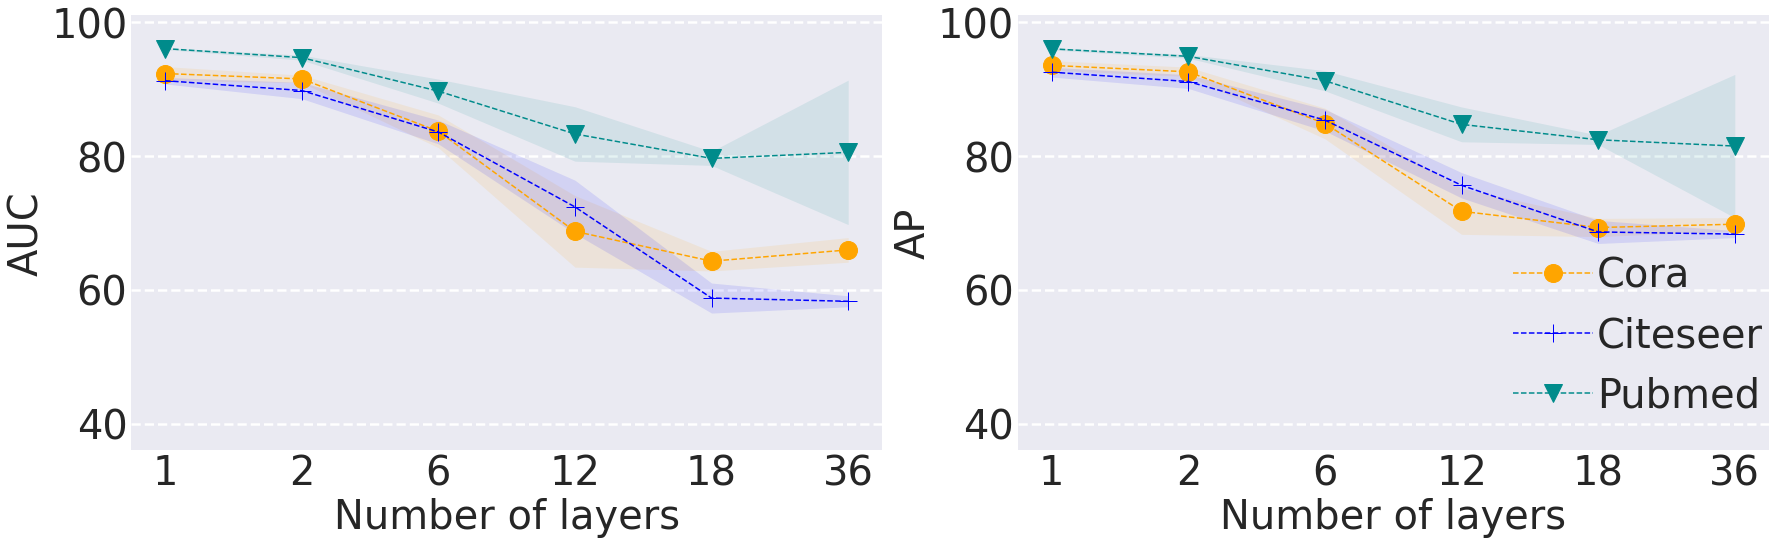

In [6]:
plt.style.use('seaborn-dark')

legend_names=['Cora','Citeseer','Pubmed']
x_names=['1','2','6','12','18','36']
x_names_dis = np.arange(len(x_names))

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(26,8))

ax1.grid(True,linestyle='--',linewidth = 2.5,zorder=-1,axis="y")
ax1.set_xticks(x_names_dis)
ax1.set_xticklabels(x_names,rotation = 0, ha="center")
ax1.set_xlabel('Number of layers', fontsize = 40)
ax1.set_yticks(np.arange(0.4,1.01,0.2))
ax1.set_yticklabels(['40','60','80','100'],rotation = 0, ha="right")
ax1.set_ylabel('AUC', fontsize = 40)
ax1.tick_params(labelsize=40)
ax1.set_ylim([0.36, 1.01])

ax2.grid(True,linestyle='--',linewidth = 2.5,zorder=-1,axis="y")
ax2.set_xticks(x_names_dis)
ax2.set_xticklabels(x_names,rotation = 0, ha="center")
ax2.set_xlabel('Number of layers', fontsize =40)
ax2.set_yticks(np.arange(0.4,1.01,0.2))
ax2.set_yticklabels(['40','60','80','100'],rotation = 0, ha="right")
ax2.set_ylabel('AP', fontsize = 40)
ax2.tick_params(labelsize=40)
ax2.set_ylim([0.36, 1.01])

markers=['o','+','v','2','s','X','d','>','*','<']
cs=['orange','blue','darkcyan','fuchsia','chocolate','dodgerblue','aqua','green','red','purple']

for i in np.arange(len(legend_names)):
    ax1.plot(x_names_dis, fea_AUC_mean_gather_all_datasets[i], marker=markers[i],linestyle='--', c=cs[i],ms=18)
    ax1.fill_between(x_names_dis, np.array(fea_AUC_mean_gather_all_datasets[i])-np.array(fea_AUC_std_gather_all_datasets[i]), np.array(fea_AUC_mean_gather_all_datasets[i])+np.array(fea_AUC_std_gather_all_datasets[i]), color=cs[i], alpha=0.1,linewidth=0.0)

for i in np.arange(len(legend_names)):
    ax2.plot(x_names_dis, np.array(fea_AP_mean_gather_all_datasets[i]), marker=markers[i],linestyle='--', c=cs[i],ms=18)
    ax2.fill_between(x_names_dis, np.array(fea_AP_mean_gather_all_datasets[i])-np.array(fea_AP_std_gather_all_datasets[i]),np.array(fea_AP_mean_gather_all_datasets[i])+np.array(fea_AP_std_gather_all_datasets[i]), color=cs[i], alpha=0.1,linewidth=0.0)

plt.subplots_adjust(right=1,wspace =0.18,hspace =0)

fig.legend(labels=legend_names,fontsize=40, loc='upper center', bbox_to_anchor=(0.93,0.525),ncol=1,handletextpad=0.1,columnspacing=1.4, fancybox=True,framealpha=0.1,shadow=True)

plt.show()